In this assignment we simulate different situations in Blackjack and using reinforcement learning we try to learn which actions are better rather than others using a 3D plot. Our corner cases are 

1. Unlimited deck as in no need to check for past cards.
2. Dealer hits with a card till it has a total higher than 17
3. If dealer crosses 21 it bursts Q = 1
4. If player crosses 21 it bursts Q = -1
5. If player and dealer have same score Q = 0 (Indecisive state)
6. Player can decide to hold at any state

First Import all the necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
import random
import IPython.display as ipd  # for display and clear_output
#%matplotlib notebook
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import copy

Function to simulate player taking a card hit This may lead to end of game or indecisive state
Function to simulate dealer taking a card hit This will lead to end of game 
different combination resulting in either player win,dealer win or indecisive state

In [10]:
def dealer_Hit(s):
    p,d  = copy.deepcopy(s)
    while d<17:
        d+= np.random.choice(range(1,11))
    return (p,d)

def check_result(s): 
    plyr,deal =copy.deepcopy(s)
    if plyr>21:
        return -1
    elif deal<17: 
        return 'U'
    elif deal>=17:
        if deal>21:
            return 1
        elif plyr==21:
            return 1
        elif plyr>deal:
            return 1
        elif plyr<deal:
            return -1
        elif plyr==deal:
            return 0
        else:
            print(plyr,deal)
    else:
        print("Not reachable state: ",plyr,deal)

def player_Hit(s):
    pl,dl = copy.deepcopy(s)
    nxt_card =  np.random.choice(range(1,11))
    pl+=nxt_card
    return (pl,dl)

def next_move(m,Q,epsilon):      # epsilon greedy climbing
    hit_move = Q[m[0]][m[1]][0]
    stand_move = Q[m[0]][m[1]][1]
    if np.random.uniform()< epsilon:
        return random.choice([(hit_move,'H'), (stand_move,'S')])
    else:
        if hit_move < stand_move:
            return stand_move,'S'
        else:
            return hit_move,'H'
        
        
def optimal_Q_value(i,j,Q):# Optimul value for Q 
    if Q[i][j][0] > Q[i][j][1]:
        return Q[i][j][0]
    else:
        return Q[i][j][1]
    
    
def Black_Jack_learner(alpha,epsilon,epochs):
    Q = np.zeros((22,22,2))   #  states with stand at higher than 10 not recorded
    fig = plt.figure(figsize=(20,10))
    winning_count = 0
    wins = []
    while epochs >= 0:
        np.random.seed(epochs)
        player_score = np.random.choice(range(1,11))
        dealer_score = np.random.choice(range(1,11))
        Game_status = False
        curr_state = (player_score, dealer_score)
        moves_count = 0
        Qmax,action_taken  =  next_move(curr_state , Q ,epsilon) 
        while not Game_status:
            if action_taken == 'H':
                next_state = player_Hit(curr_state)    
            elif action_taken == 'S':
                next_state =dealer_Hit(curr_state)
            reward = check_result(next_state)
            if reward == 'U':
                Qmax,action_taken  =  next_move(next_state , Q ,epsilon) 
                Q[curr_state[0]][curr_state[1]][0] += alpha *( Qmax - Q[curr_state[0]][curr_state[1]][0])
                curr_state = next_state 
            else:
                Game_status = True
                if reward == 1:
                    winning_count+=1
                if action_taken == 'H': 
                    Q[curr_state[0]][curr_state[1]][0] += alpha *(reward -Q[curr_state[0]][curr_state[1]][0])  
                else:
                    Q[curr_state[0]][curr_state[1]][1] += alpha *(reward -Q[curr_state[0]][curr_state[1]][1])
            if epochs%25==0:
                wins.append(winning_count/25)
                winning_count = 0
        
            if epochs%1000 == 0: #3d plot
                a = range(22)
                b = range(22) 
                X, Y = np.meshgrid(a, b)
                Z = np.zeros((22,22))
                for i in range(len(a)):
                    for j in range(len(b)):
                        Z[i][j] = optimal_Q_value(i,j,Q)
                plt.clf() 
               
                ax = plt.axes(projection='3d')
                ax.plot_surface(X, Y, Z,cmap=cm.binary_r,linewidth=0, antialiased=False)
                plt.xlim(0,21)
                plt.ylim(0,21)
                ax.set_xlabel('Dealer_score')
                ax.set_ylabel('Player_score')
                ax.set_zlabel('Qmax_value')
                ipd.clear_output(wait=True)
                ipd.display(fig)
                
        epochs-=1
    ipd.clear_output(wait=True)
    return Q,wins

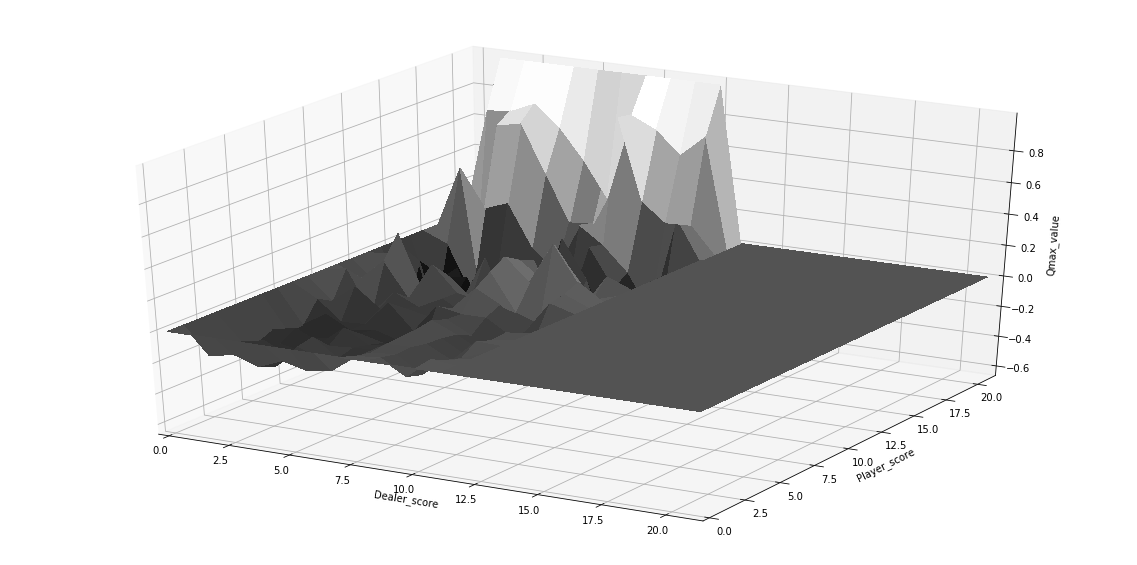

In [11]:
R,wins = Black_Jack_learner(0.1, 0.1,10000)



([<matplotlib.lines.Line2D at 0x7fba69be3dd8>], 0.68)

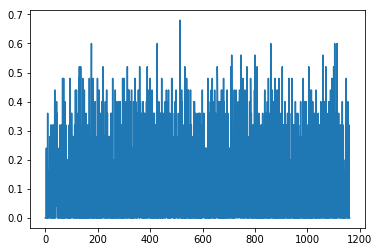

In [12]:
plt.plot(wins), max(wins)

In conclusion, after simulating for different iterations it can be seen that alph value of 0.4 and epsilon value of 0.09 gives the best learning scheme while the game is constantly learning kept epoch of 10000 but after first 1000 games much learns the next steps and keeps an average wins of 11-12 wins for each game.